在上一篇博客中，我们总结了集成学习的原理，并展开介绍了集成学习中Bagging和随机森林这一分枝算法，在本篇博客中，我们继续介绍另一个分枝——Boosting，并对Boosting系列中的经典算法Adaboost展开分析。

# 1 Boosting

Boosting系列算法又称为提升学习算法，算法目标就是将弱分类器提升为强分类器。这里的弱分类器和强分类器是根据准确率对学习器进行的一种划分，弱分类器准确率较低（高于50%即可），强分类器则需要有一个有令人满意准确率。很明显，强分类器是机器学习的最终目标，但在很多场景下，直接训练获取一个强分类器有时候是非常困难的，相比之下，但弱分类器通常通过简单训练即可获得，通过反复学习获得大量弱分类器进行组合也可以获得一个性能优异的强分类器。如果只是这样的话，那么Boosting与Bagging列些的集成算法也就没什么太大区别，在上一篇博客中，我们说过集成学习的所有基本分类器满足符合以下两个条件：  
（1）基本分类器之间应该有差异性。如果基本分类器将没有差异，那么集成起来的结果是没有变化的。  
（2）每个基本分类器的精度必须大于0.5。  
用一句话说就是所有的基本分类器必须“好而不同”，为了达到这一目的，Boosting使用了加法模型和前向分步算法。  
加法模型是指强学习器是由一个个弱分类器累加组合而来：
$${H_M}(x) = \sum\limits_{m = 1}^M {{\alpha _m}{h_m}(x)} $$
其中，${{h_m}(x)}$是指第$m$个弱分类器，${\alpha _m}$是${{h_m}(x)}$在$M$个分类器中的权重。
前向分步算法是指在算法迭代过程中，每一个分类器是又上一次迭代产生的分类器基础上进行训练获得。数学表示如下：  
$${H_m}(x) = {H_{m - 1}}(x) + {\alpha _m}{h_m}(x)$$
Boosting正在集成思想上结合加法模型和前向分步算法的一种集成学习方法：首先从初始训练集中训练一个初始基本分类器，在根据初始分类器的表现对训练样本分布进行调整，使得训练下一个分类器时对上一个学习器误分类样本更加关注，通过此种方式不同循环训练一系列分类器，直到分类器达到指定数量亦或者累加后的强分类器达到指定精度。  
前向分步算法决定了在Boosting系列算法中，所有分类器间只能是一种串行的结构，每一个分类器只能在上一个的学习器基础上进行学习，这是与Bagging系列算法分类器间的并行结构最大的不同。  
建立在这一思想的基础上，很多Boosting系列算法相继提出，AdaBoost算法就是其中之一。本文接下来内容对AdaBoost算法展开介绍。

# 2 AdaBoost
## 2.1 算法原理
AdaBoost，是英文Adaptive Boosting的缩写，可直接翻译为自适应提升算法，由Yoav Freund和Robert Schapire在1995年提出。AdaBoost算法在每一次迭代中根据训练集之中每个样本的分类正确与否，以及上次的总体分类的准确率，来为每个样本设置一个权值，通过增加在上一个弱分类器中被误分类的样本的权值使得该样本在下一次迭代训练弱分类器时得到更多的重视，通过这种方式，每一次迭代都前面弱分类器分类结果基础上训练新的分类器，最终将弱分类器融合起来，作为强分类器进行决策使用，如下图所示。细致一点来说，AdaBoost就可以分为以下三个步骤：  
（1）为训练集中每一个昂本初始化一个权值，例如有$N$个样本，那么每个样本权值都为$\frac{1}{N}$。  
（2）通过循环迭代的方式训练大量的弱分类器，每一次迭代的操作如下：结合样本现有的权值和本次训练中分类的正确与否更新样本的权值，正确分类样本权值将降低，错误分类样本权值增加，将更新后的权值传递到下一次迭代中，是的在训练下一个弱分类器时之前被误分类的样本得到更多的关注。  
（3）根据准确率为每个弱分类器设置一个权值（注意，这里的权值是弱分类器的权值，跟第二步中的样本权值是不一样的），使准确率高的分类器在有更高的“决策权”，然后通过加权求和的方式对所有弱分类器进行组合获得一个最终的强分类器。  
那么，样本权值在每一次迭代过程中具体怎样更新和传递，又是如何影响下一轮的迭代中学习器对样本的重视程度？学习器的权重怎么计算？带着这些问题，我们结合数学计算来详细叙述AdaBoost算法的各个步骤。先来说说分类问题。  
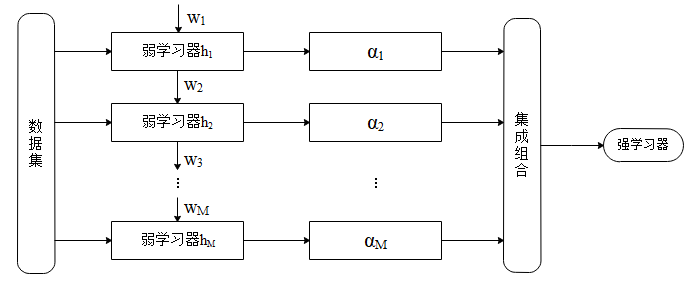

## 2.2 分类问题

给定一个二分类数据集$D = \{ ({x_1},{y_1}),({x_2},{y_2}), \cdots ,({x_N},{y_N})\} $，其中样本的特征向量${x_i} \in X \subseteq {R^n}$，样本标签
${y_i} \in Y = \{  - 1, + 1\} $。通过AdaBoost算法对$D$进行分类，步骤如下：  
（1）初始化$D$中所有样本的权值分布。在算法初始化时，尚未对数据集进行拟合，也没有任何其他先验假设，所以对所有样本“平等视之”，即所有样本相等：  
$$W = ({w_{11}}, \cdots ,{w_{1i}}, \cdots ,{w_{iN}}),{w_{1i}} = \frac{1}{N},i = 1,2, \cdots ,N  \tag{1}$$
（2）进行$M$次迭代，其中第$m$次迭代的具体过程如下：  
&#160; &#160; &#160; &#160;（a）使用设定好的学习算法对训练集$D$进行学习，构建弱分类器${h_m}(x):X \to \{  - 1, + 1\} $。若样本$x_i$被误分类，则有${y_i} \ne {h_m}({x_i})$，所以结合各样本权值，误差率可以按如下公式计算：
$$e_m = \sum\limits_{{y_i} \ne {h_m}({x_i})} {{w_{mi}}} $$
从误差率的计算公式中可以看出，所谓误差率就是所有误分类样本权值之和。  
&#160; &#160; &#160; &#160;（b）计算${h_m}(x)$的系数：
$${\alpha _m} = \frac{1}{2}\ln \frac{{1 - {e_m}}}{{1 + {e_m}}}  \tag{2}$$
这个${\alpha _m}$的作用是在衡量分类器$h_m(x)$的“话语权”，$h_m(x)$误差率越高，${\alpha _m}$值越小，对集成后强分类器结果的影响就越小。  
&#160; &#160; &#160; &#160;（c）根据在（a）中计算好的误差率，更新数据集$D$中各样本的权值分布：
$$W = ({w_{m + 1,1}}, \cdots ,{w_{m + 1,i}}, \cdots ,{w_{m + 1,N}})$$  

$${w_{m + 1,i}} = \frac{{{w_{m,i}}}}{{{Z_m}}}\exp \left( { - {\alpha _m}{y_i}{h_m}({x_i})} \right)  \tag{3}$$
$${Z_m} = \sum\limits_{i = 1}^N {{w_{m,i}}\exp \left( { - {\alpha _m}{y_i}{h_m}({x_i})} \right)} $$

我们来分析一下这个式（3）。$Z_m$是归一化因子，权值计算时除以$Z_m$是为了让所有样本权值之和为1。接着分析指数部分的${ - {\alpha _m}{y_i}{h_m}({x_i})}$，这才是重点，当样本被正确分类是，${{h_m}({x_i})}=y_i$，所以${{h_m}({x_i})}$与$y_i$一定同为正或同为负，${\alpha _m}$是正数，于是${ - {\alpha _m}{y_i}{h_m}({x_i})}$就小于0，指数运算后的值就小于1，所以权值相乘后结果减小，这就达到了降低正确分类样本在下一次迭代中的权值的目的。反之，对于误分类样本，指数运算后的值就大于1，与权值相乘后就结果增大，达到增加误分类样本在下一次迭代中的权值目的。  
（3）组合在第二步走训练好的所有弱分类器：
$$H'(x) = \sum\limits_{m = 1}^M {{\alpha _m}{h_m}(x)} $$
那么，最终的强分类器可以表示为：
$$H(x) = sign\left( {H'(x)} \right) = sign\left( {\sum\limits_{m = 1}^M {{\alpha _m}{h_m}(x)} } \right)$$

## 2.3 回归问题
AdaBoost算法在解决回归问题时的求解步骤和原理与2.2节中分类问题是很类似的。  
（1）初始化$D$中所有样本的权值分布。
$$W = ({w_{11}}, \cdots ,{w_{1i}}, \cdots ,{w_{iN}}),{w_{1i}} = \frac{1}{N},i = 1,2, \cdots ,N$$
（2）进行$M$次迭代，其中第$m$次迭代的具体过程如下：   
&#160; &#160; &#160; &#160;（a）使用设定好的学习算法对训练集$D$进行学习，计算${h_m}$的误差率。不过，在计算误差率前，需要计算最大误差${E_m}$和相对误差${e_{m,i}}$：  
$${E_m} = \max \left| {{y_i} - {h_m}({x_i})} \right|,i = 1,2, \cdots ,N$$
相对误差可以使用线性误差、平方误差或者指数误差。  
线性误差：${e_{m,i}} = \frac{{\left| {{y_i} - {h_m}({x_i})} \right|}}{{{E_m}}}$  

平方误差：${e_{m,i}} = \frac{{{{\left( {{y_i} - {h_m}({x_i})} \right)}^2}}}{{{E_m}}}$  

指数误差：${e_{m,i}} = 1 - \exp \left( { - \frac{{\left| {{y_i} - {h_m}({x_i})} \right|}}{{{E_m}}}} \right)$  

然后计算误差率$e_m$：
$${e_m} = \sum\limits_{i = 1}^N {{w_{m,i}}{e_{m,i}}} $$
&#160; &#160; &#160; &#160;（b）计算${h_m}(x)$的系数：
$${\alpha _m} = \frac{{{e_m}}}{{1 - {e_m}}}$$
&#160; &#160; &#160; &#160;（c）更新所有样本的权重分布：
$$W = ({w_{m + 1,1}}, \cdots ,{w_{m + 1,i}}, \cdots ,{w_{m + 1,N}})$$ 
$${w_{m + 1,i}} = \frac{{{w_{m,i}}}}{{{Z_m}}}{\alpha _m}^{1 - {e_{m,i}}}$$
$${Z_m} = \sum\limits_{i = 1}^N {{w_{m,i}}{\alpha _m}^{1 - {e_{m,i}}}} $$
（3）在回归问题中，组合策略也与分类问题有所区别，采用的是对加权后的弱学习器取中位数的方法，最终的强回归器为：
$$H(x) = \left( {\sum\limits_{m = 1}^M {\ln (\frac{1}{{{\alpha _m}}})} } \right) \cdot g(x)$$
式中，$g(x)$表示${\alpha _m}{h_m}(x),m = 1,2, \cdots ,M$序列中的中位数。

# 3 总结
最后对AdaBoost算法进行一下总结。AdaBoost主要有如下特性：   
（1）简单易用，需要进行调节的参数很少；  
（2）原始的AdaBoost算法只适用于二分类任务；  
（3）对于噪声数据较为敏感，这是因为AdaBoost算法倾向于对噪声数据进行拟合，容易造成过拟合；  
（4）弱学习器可以使用任何算法进行构建，例如可使用逻辑回归、决策树、线性回归等；  
（5）可以用来做特征选择，例如进行人群信用风险评估时，特征属性宝库年龄、居住地址、收入、有无不动产等等，用AdaBoost算法金信诺迭代时，每一次迭代需要用一个弱分类器划分数据样本，假设用的是决策树算法，我们只能选择一个特征属性进行划分数据样本，在建模完成后，看看弱分类器都是使用那些特征属性进行决策就可以知道哪些特征属性重要，方便做出特征选择。  
